In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import requests #For getting files
import zipfile #For managing zips
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas as pd #Gives us DataFrames
import numpy as np #Math and matrices
import matplotlib.pyplot as plt #For graphics

# statsmodels is a popular Python statistics package
import statsmodels.api as sm
# Let's also import its graphics module
import statsmodels.graphics.api as smg
# And the mediation module
from statsmodels.stats.mediation import Mediation

# Pipelines to add text-based quantiative variables for regressions
from transformers import pipeline

# We have a lot of features, so let's set Pandas to show all of them.
pd.set_option('display.max_columns', None)

## <font color="red">*Exercise 1*</font>

<font color="red">Describe 2 separate predictions relevant to your project and associated texts, which involve predicting text that has not been observed based on patterns that have. Then, in a single, short paragraph, describe a research design through which you could use textual features and the tools of classification and regression to evaluate these predictions.

1. When the network connections of a investors post positively about investment, the investor is more likely to post positively as well.
2. Investors with fewer connections tend to be more 'stubborn' - does not change their sentiment much - than those with more connections.

With posts and investor network information (i.e., following-follower) collected, we could use classification techniques to classify posts to positive/negative/neutral categories, or calculate sentiment scores. Then we may regress the sentiment scores of investors (the dependent variable) on the scores of his connections (the independent variable of interest). 

For the second prediction, we may want to calculate a volatility score to capture how investors change their sentiment(the dependent variable), and regress it on the number of network connections (the independent variable of interest). 

## <font color="red">*Exercise 2*</font>

<font color="red">Propose a simple causal model in your data, or a different causal model in the annotated Internet Arguments Corpus (e.g., a different treatment, a different outcome), and test it using a linear or logistic regression model. If you are using social media data for your final project, we encourage you to classify or annotate a sample of that data (either compuationally or with human annotators) and examine the effect of texts on replies to that text (e.g., Reddit posts on Reddit comments, Tweets on Twitter replies, YouTube video transcripts on YouTube comments or ratings). You do not need to make a graph of the causal model, but please make it clear (e.g., "X affects Y, and C affects both X and Y.").
    
<font color="red">Also consider using the [ConvoKit datasets](https://convokit.cornell.edu/documentation/datasets.html)! Anytime there is conversation, there is an opportunity to explore the effects of early parts of the conversation on later parts. We will explore this further in Week 8 on Text Generation and Conversation.
    
<font color="red">***Stretch*** (not required): Propose a more robust identification strategy using either matching, difference in difference, regression discontinuity, or an instrumental variable. Each of these methods usually gives you a more precise identification of the causal effect than a unconditional regression. Scott Cunningham's [Causal Inference: The Mixtape](https://mixtape.scunning.com/) is a free textbook on these topics, and all have good YouTube video explanations.

Since I have not got the investor network data ready, for this question, I used a dataset of investment related Youtube videos that I recently built. Here views are measured with thousands, and time (how long has the video been posted) with years (0 if less than 1 year).

I expected that post time and sentiment of the videos title would affect the number of views it get. Since the dataset is too large, I used a subset for this exercise. Sadly, the regression does not suggest significance of any of the independent variables.

In [2]:
df = pd.read_csv('videos_clean.csv')
df.head()

,title,url,ticker,channel,views,time,snippet,channel_link
0,Is Clearpoint Neuro #CLPT the next Multibagger?,https://www.youtube.com/watch?v=O2lWWZzAzMY,CLPT,MOAT Investing,1,0,Clearpoint Neuro $CLPT utilizes a hospital's e...,https://www.youtube.com/c/MOATInvesting
1,ClearPoint System Overview,https://www.youtube.com/watch?v=KlYsz3iywnc,CLPT,"ClearPoint Neuro, Inc.",2,2,An overview of the ClearPoint Neuro Navigation...,https://www.youtube.com/c/ClearPointNeuroInc
2,"Comments on the ""Bitcoin Black Paper"" (Why Bit...",https://www.youtube.com/watch?v=XeG0FzPxSh4,CLPT,N N Taleb's Probability Moocs,82,0,The main paper and the supplementary equations...,https://www.youtube.com/channel/UC8uY6yLP9BS4B...
3,Reacting To Losing -$116k Dollars In Seconds (...,https://www.youtube.com/watch?v=To-G9Y8Z2Z8,CLPT,Deadnsyde,755,0,fingers crossed for tomorrow 99 cent Deadnsyde...,https://www.youtube.com/c/Deadnsyde
4,Peter Lynch: How to Invest in an Overvalued Ma...,https://www.youtube.com/watch?v=iX_8UI9frjE,CLPT,New Money,527,1,Peter Lynch is a world famous stock market inv...,https://www.youtube.com/c/AussieWealthCreation


In [3]:
df['title_len'] = df['title'].apply(lambda x:len(x))
df['snippet_len'] = df['snippet'].apply(lambda x:len(x))

In [17]:
df_short = df[::101]

In [18]:
%%time
sentiment = pipeline("sentiment-analysis")
df_short['title_sentiment'] = df_short['title'].apply(lambda x: sentiment(x[:512])[0]['score'])
df_short['snippet_sentiment'] = df_short['snippet'].apply(lambda x: sentiment(x[:512])[0]['score'])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


CPU times: user 1min 39s, sys: 1.79 s, total: 1min 41s
Wall time: 1min 43s


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
y = df_short['views']
X_cols = ['time', 'title_sentiment','title_len', 'snippet_sentiment','snippet_len']
X = sm.add_constant(df_short[X_cols])

lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.796
Date:                Wed, 23 Feb 2022   Prob (F-statistic):              0.111
Time:                        01:49:34   Log-Likelihood:                -11036.
No. Observations:                 934   AIC:                         2.208e+04
Df Residuals:                     928   BIC:                         2.211e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              7544.0158   1.67e+04      0.452      0.651   -2.52e+04    4.03e+04
time                135.5792    247.874      0.547      0.585    -350.879     622.038
title_sentiment    4112.2466    1.1e+04      0.373      0.709   -1.75e+04    2.57e+04
title_len           -59.1392     51.673     -1.144      0.253    -160.549      42.270
snippet_sentiment  1.066e+04   1.19e+04      0.899      0.369   -1.26e+04    3.39e+04
snippet_len        -128.9024     54.638     -2.359      0.019    -236.130     -21.675
==============================================================================
Omnibus:                     2039.047   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5548014.213
Skew:                          18.345   Prob(JB):                         0.00
Kurtosis:                     378.786   Cond. No.                     2.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Though the regression results indicate high collinearity, the correlation matrix does not show that.

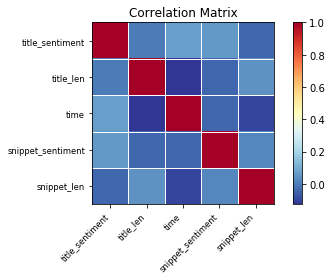

In [25]:
corr_matrix = np.corrcoef(df_short[X_cols].T)
smg.plot_corr(corr_matrix, xnames=X_cols)
plt.show()

## <font color="red">*Exercise 3*</font>

<font color="red">Propose a measure you could generate to fill in or improve upon the simple causal model you proposed above and how you would split the data (e.g., a % of your main data, a separate-but-informative dataset). You do not have to produce the measure.
    
<font color="red">***Stretch*** (not required): Produce the measure and integrate it into your statistical analysis. This could be a great approach for your final project!

Perhaps investors would be more likely to move their sentiment towards his connections', when they speak about certian topics. So, we may randomly split the data and take a subset (perhaps 1/10 if the data size is large) and build a LDA topic model on it. Then extract commonly used words in each topic, incorporate them into the regression (e.g., the number of words in topic one the investors' connections use in their posts), and see if that would affect our results.

## <font color="red">*Exercise 4*</font>

<font color="red">Propose a mediation model related to the simple causal model you proposed above (ideally on the dataset you're using for your final project). If you have measures for each variable in the model, run the analysis: You can just copy the "Mediation analysis" cell above and replace with your variables. If you do not have measures, do not run the analysis, but be clear as to the effect(s) you would like to estimate and the research design you would use to test them.

The causal relationship between investors' sentiment and the network connections' sentiment may be mediated by topics. For instance, conections who post negatively about their investment may tend to talk about certian topics, and those topics would influence the perceptions of the investor who read them.

I have not prepared the data yet but as mentioned above, we may randomly split the data and take a subset (perhaps 1/10 if the data size is large) and build a LDA topic model on it. Then extract commonly used words in each topic, incorporate them into the regression (e.g., the number of words in topic one the investors' connections use in their posts), and see if that would affect our results.

## <font color="red">*Exercise 5*</font>

<font color="red">Propose a confounder in your final project data that could be controlled for using the method of Pryzant et al. Generate an appropriate CSV file and run it on some vocabulary in your corpus. If you have no such confounder available for your final project, you can use `complaints.csv` with a new vocabulary or for different variables (e.g., `Sub-product`, `Company`) or you can further explore the interesting case of `mortgage`. Also keep in mind the [ConvoKit datasets](https://convokit.cornell.edu/documentation/datasets.html). In any case, be sure to interpret the results. What does the output of `causal_attribution.score_vocab()` mean in your context?

For my final project, a confounder that could be controlled by Pryzant et al's method is the industry of the stock. For example, perhaps posts about the enery industry is more likely to sway people's perception.

Since I don't have the data for the final project in my hand, I used the Youtube video data as in exercise 2. I hope to predict views with video title, while the names of channel may be a confounder - users may indicate that they are professional investors by including words such as 'CFA', 'manager', 'agent', 'consultant' in their channel names.



In [58]:
df['high_views'] = df['views'].apply(lambda x: 'Yes' if x>100 else 'No')

In [59]:
df['high_views']

0         No
1         No
2         No
3        Yes
4        Yes
        ... 
94311    Yes
94312     No
94313     No
94314     No
94315     No
Name: high_views, Length: 94316, dtype: object

In [60]:
df.to_csv("videos_clean.csv", encoding='utf-8', index=False)

In [61]:
pd.read_csv("videos_clean.csv")

,title,url,ticker,channel,views,time,snippet,channel_link,title_len,snippet_len,high_views
0,Is Clearpoint Neuro #CLPT the next Multibagger?,https://www.youtube.com/watch?v=O2lWWZzAzMY,CLPT,MOAT Investing,1,0,Clearpoint Neuro $CLPT utilizes a hospital's e...,https://www.youtube.com/c/MOATInvesting,47,127,No
1,ClearPoint System Overview,https://www.youtube.com/watch?v=KlYsz3iywnc,CLPT,"ClearPoint Neuro, Inc.",2,2,An overview of the ClearPoint Neuro Navigation...,https://www.youtube.com/c/ClearPointNeuroInc,26,99,No
2,"Comments on the ""Bitcoin Black Paper"" (Why Bit...",https://www.youtube.com/watch?v=XeG0FzPxSh4,CLPT,N N Taleb's Probability Moocs,82,0,The main paper and the supplementary equations...,https://www.youtube.com/channel/UC8uY6yLP9BS4B...,70,57,No
3,Reacting To Losing -$116k Dollars In Seconds (...,https://www.youtube.com/watch?v=To-G9Y8Z2Z8,CLPT,Deadnsyde,755,0,fingers crossed for tomorrow 99 cent Deadnsyde...,https://www.youtube.com/c/Deadnsyde,59,128,Yes
4,Peter Lynch: How to Invest in an Overvalued Ma...,https://www.youtube.com/watch?v=iX_8UI9frjE,CLPT,New Money,527,1,Peter Lynch is a world famous stock market inv...,https://www.youtube.com/c/AussieWealthCreation,50,123,Yes
...,...,...,...,...,...,...,...,...,...,...,...
94311,What’s the Difference Between an MRI and a CT?,https://www.youtube.com/watch?v=aQZ8tTZnQ8A,MRIC,RAYUS Radiology™,3000,5,You may need an MRI or CT scan but not know wh...,https://www.youtube.com/c/Mycdi,46,128,Yes
94312,Artificial Intelligence Penny Stock with HUGE ...,https://www.youtube.com/watch?v=47DuF6jiHio,MRIC,JT Wealth,15,0,Taking a look at an artificial intelligence co...,https://www.youtube.com/c/JTWealth,64,133,No
94313,5 UNDERVALUED PENNY STOCKS! 💥 ANALYSTS HAVE 55...,https://www.youtube.com/watch?v=FzgcevTn83Q,MRIC,Brendan Guastaferro,2,2,5 UNDERVLAUED Penny Stocks! + 2 BONUS STOCKS! ...,https://www.youtube.com/channel/UC3iIVoAYW6dtp...,77,114,No
94314,Is Clearpoint Neuro #CLPT the next Multibagger?,https://www.youtube.com/watch?v=O2lWWZzAzMY,MRIC,MOAT Investing,1,0,Clearpoint Neuro $CLPT utilizes a hospital's e...,https://www.youtube.com/c/MOATInvesting,47,127,No


In [28]:
import causal_attribution

In [62]:
%%time

importance_scores = causal_attribution.score_vocab(
    vocab=[
           # Words I expect to be associated with Product
           'CFA','professional','manager','inc', 'consultant', 'agent', 'analyst',
           # Words I expect to be associated with views
           'top','most','analysis','buy','comment', 'increase', 'promising', 'growth',
           # Words I expect to not be associated with either
           'what','how','help','why','people'
          ],
    csv='videos_clean.csv',
    delimiter=",",
    name_to_type={
        'title': 'input',
        'channel': 'control',
        'high_views': 'predict',
    })

CPU times: user 2min 48s, sys: 17.7 s, total: 3min 6s
Wall time: 2min 11s


In [65]:
importance_scores['high_views']['Yes']

[('UNK', 2.0017787201795727),
 ('why', 0.7432611707481556),
 ('CFA', 0.6627173854358261),
 ('consultant', 0.3569107243529288),
 ('agent', 0.3194133494980633),
 ('buy', 0.2766691543511115),
 ('PAD', 0.13449170836247504),
 ('what', 0.060353699256666005),
 ('how', 0.02663266018498689),
 ('promising', -0.0070407274179160595),
 ('professional', -0.011655279250589956),
 ('most', -0.11483261379180476),
 ('people', -0.140654566581361),
 ('analysis', -0.25847389560658485),
 ('inc', -0.3833324135048315),
 ('comment', -0.49228853552631335),
 ('help', -0.7925938710104674),
 ('increase', -0.8144183354452252),
 ('growth', -0.8580835144966841),
 ('top', -0.9375890359515324),
 ('analyst', -1.0986533458344638),
 ('manager', -1.12754247256089)]

The result shows that including words like 'CFA', 'consultant' and 'agent' still help a videos to get high number of views even though we controlled the channel name.

## <font color="red">*Exercise 6*</font>

<font color="red">Pick one other paper on causal inference with text from the ["Papers about Causal Inference and Language
" GitHub repository](https://github.com/causaltext/causal-text-papers). Write at least three sentences summarizing the paper and its logic of design in your own words.
    
<font color="red">***Stretch*** (not required): Skim a few more papers. The causal world is your textual oyster!

The paper I choose is "When do Words Matter? Understanding the Impact of Lexical Choice on
Audience Perception using Individual Treatment Effect Estimation".

The paper aims to offer general methods for estimating the causal effect of changing on word on a certain sentence. One common and conventional way to identify such effect is through a Randomized Control Trial, which could easily disintangle treatment effect from the context, but is difficult to scale up for generalization. The authors propose two types of estimaters based on Individual Treatment Effect estimation - they formulate a ITE they call Lexical Substitution Effect (LSE) estimation specifically for the given context. The first method analyzes individual effect for labeled sentences, the second method approach the task as a classfication problem: to predict lebel $\tau$, by $(\omega_i, \omega_j, s)$ (word before change, word after change and sentence). They apply the methos to three dataset - Airbnb listings, Yelp reviews, and Twitter messages. They also conduct RCT with the help of MTurkers to validate the robustness of their algorithmic estimates.